# Project: No-Show appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

This dataset collects information from over 100K medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? A number of characteristics about the patient are included in the dataset description. The dataset can be found [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments) on kaggle.


### <li> Dataset description
    
<li> PatientId: 
Identification of a patient
<li> AppointmentID:
Identification for each appointment
<li> Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
<li> DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
<li> DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
<li> Age: 
How old is the patient.
<li> Neighbourhood: 
Where the appointment takes place.
<li> Scholarship: 
True of False . Observation, this is a broad topic, consider reading this article 
<li> Hipertension: 
True or False
<li> Diabetes: 
True or False
<li> Alcoholism: 
True or False
<li> Handcap: 
True or False
<li> SMS_received: True or False
    
<li> No-Show: Whether the patient showed up for the appointment (True or False)

### <li> Questions Investigated

1. Does a certain Age group tend to show more for a scheduled appointment? If Yes, why?
2. Do patients with ailments show up more for appointments?
3. Is enrollment in the welfare programme a determining factor for patients showing up for their scheduled appointments?
4. Does waiting time have an effect on patients showing up or missing an appointment?
5. Does SMS receival influence the showing of a patient for a scheduled appointment?
 


<a id='wrangling'></a>
## Data Wrangling

### <li> General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset into the notebook and viewing the first few rows.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking the size of the dataset

df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the `df.info()` method executed in the row above, it can be seen that there are no null values in the DataFrame; but the `ScheduledDay` and `AppointmentDay` columns are not in their required format and will be set to the required format which is the **datetime** format. A better look at the number of null values in the DataFrame can be seen by executing the `df.isnull().sum()` method which shows that no column in the DataFrame contains a null value.


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

The method `df.duplicated().sum()` executed above is used to determine the number of duplicate values in the dataframe and from the result generated, it indicates that there are no duplicate values in the dataframe.  

In [7]:
# this checks for the number of unique values in each column of the DataFrame

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

By checking for the number of unique values in each column in the dataframe using the `df.nunique()` method, it can be deduced that no two appointment made with the doctor was the same, some patients visited the doctor more than once and also, some patients had more than one disability as seen in the `Handcap` column.

In [8]:
# this gives a quick statistics of the numerical columns in the DataFrame

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From a quick description of the dataset generated with the `df.describe()` method, the following deductions can be made:

1. There is an outlier in the `Age` column because it is impossible to have an age of -1 so it will be removed.
2. Majority of the patients were between the ages of 18 and 55 although we have aged patients with ages >100
3. About **9%** of the total appointments recorded had patients who were **registered under the Brazilian Welfare program.**
4. **About 19%** of total AppointmentID recorded had patients suffering from **hypertension**, **7% were suffering from Diabetes,** a meagre **3% were alcoholics**, **2% had one disability or the other** while just **32% received an SMS notification as a reminder of their appointment with the doctor.**

### <li> Data Cleaning

As was detected when the `df.info()` method was run under the general properties section, the `ScheduledDay` and `AppointmentDay` columns contained wrong formats for analysis and they are changed into their required format below. I don't need the `Neighbourhood` column for this analysis, so it will be dropped. The `df.dtypes` property is executed to confirm the change.

In [9]:
# The scheduledDay and AppointmentDay columns are changed to the datetime format

df = df.astype({'ScheduledDay':'datetime64', 'AppointmentDay':'datetime64'})

# dropping the Neighbourhood column

df.drop(['Neighbourhood'], axis=1, inplace = True)

print(df.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object


As observed when the `df.describe()` method was executed, an outlier was detected in the `Age` column and it is removed in the code cell below. A look at the size of the dataframe with the `df.shape` attribute confirms that the outlier has been removed because the number of rows reduces from 110527 to 110526.

After this, the data is quite clean and would not require any further cleaning step but rather diving into an Exploratory analysis of the data.

In [10]:
# Removing the outlier in the Age column

df = df.query('Age != -1') 
df.shape

(110526, 13)

<a id = analysis></a>

## Exploratory Data Analysis

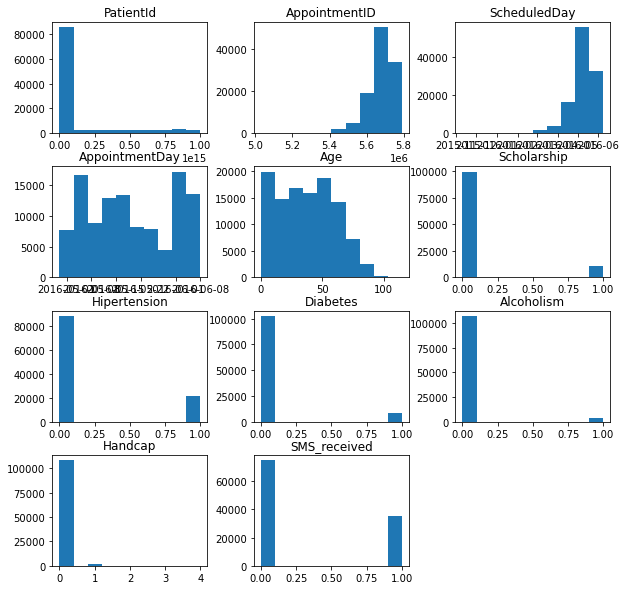

In [11]:
df.hist(figsize=(10, 10), grid=False);

### Investigating the Gender Column

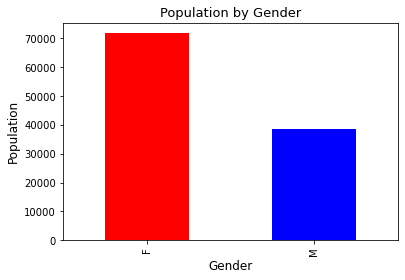

In [12]:
df['Gender'].value_counts().plot(kind = 'bar', color = ['red', 'blue']);
plt.ylabel('Population', fontsize= 12)
plt.xlabel('Gender', fontsize =12)
plt.title('Population by Gender', fontsize=13);


A quick look at the plot of the `Gender` column proves that females appear to be present more than males in this dataset.

### Analysing the Date Columns

In [13]:
# Subtracting the ScheduledDay column from the AppointmentDay Column to create a new column of Waiting Days

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,-1


Due to the presence of the timestamp in the `ScheduledDay` column, the subtraction made where the date values in the  `ScheduledDay` and `AppointmentDay` columns are the same returns a value of **-1** in the `WaitingDays` column.

This can be corrected by replacing all the values of **-1**  in the `WaitingDays` column with **0**. Since the Scheduling and Appointment happened on the same day, it simply mean the patient didn't have to wait a whole day before seeing the doctor.

In [14]:
# replacing the values of -1 with 0 in the WaitingDays column
df['WaitingDays'].replace(-1, 0, inplace=True)

# Confirming the replacement
df.query('WaitingDays == -1') # this returns an empty dataframe because no value of -1 exists anymore.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays


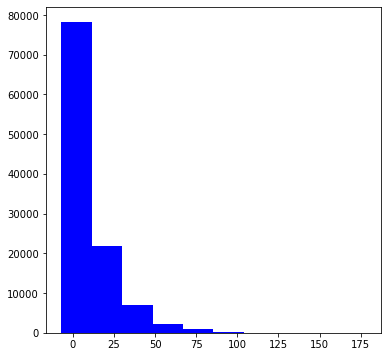

In [15]:
# Creating a custom function for plotting to avoid code repetition.

def plot_figure(df, xlabel, ylabel, title, plot_type, color, figsize):
    
    """
    A custom function for creating exploratory visualisations
    by providing the dataframe, the plot type ('hist' or 'bar') and axis details.
    """
    df.plot(grid = False, kind = plot_type, color = color, figsize = figsize)
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)
    plt.title(title, fontsize = 13)
    
    return;

plot_figure(df=df['WaitingDays'], xlabel=None, ylabel=None, 
            title=None, plot_type='hist', 
            color = 'blue', figsize = (6,6))


Looking at the histogram of `WaitingDays` above, the values do not begin from 0. This means there are still some values in the `WaitingDays` column that are less than zero. A quick investigation of the `WaitingDays` column using the `df.query()` method proves this.

In [16]:
df.query('WaitingDays < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,0,0,0,0,1,0,Yes,-2
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,0,0,0,0,1,0,Yes,-2
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,0,0,0,0,0,0,Yes,-2
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,0,0,0,0,0,0,Yes,-7
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,0,0,0,0,0,0,Yes,-2


Since it is impossible to have the `ScheduledDay` column greater than the `AppointmentDay` column, all rows that have waiting days < 0 will be removed.

In [17]:
# Removing the 5 rows with WaitingDays < 0

df_edited = df.query('WaitingDays >= 0')

df_edited.shape

(110521, 14)

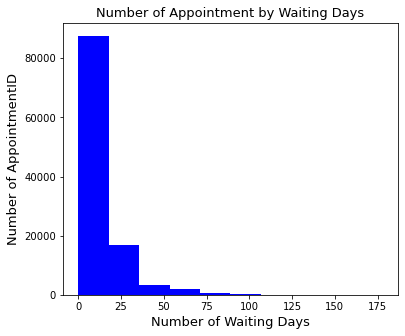

In [18]:
# Calling the plot_figure function to plot histogram of the edited dataframe. 

plot_figure(df=df_edited['WaitingDays'], 
            plot_type = 'hist', color = 'blue',
            xlabel='Number of Waiting Days', 
            ylabel='Number of AppointmentID', 
            title='Number of Appointment by Waiting Days',
           figsize = (6,5))

From the new histogram plot above, it can be deduced that most appointments were fixed on the day it was scheduled (registered) which invariably means that most patients had the opportunity to see the doctor the day their appointment was registered.

### Segmenting the Age Column

Segmenting the `Age` column into different Age groups will help in determining the population distribution of age ranges in this dataset and also help in determining their respective characteristics.

In [19]:
# Segmenting the Age column into age groups

Age_bins = [0, 20, 40, 60, 80, 100, 120]
Age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']
AgeGroup = pd.cut(df_edited['Age'], bins=Age_bins, labels=Age_labels, include_lowest=True)

df_edited['AgeGroup'] = AgeGroup


C:\Users\WILLIA~1\AppData\Local\Temp/ipykernel_14440/2893087056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edited['AgeGroup'] = AgeGroup


AgeGroup
0-20       31846
20-40      28833
40-60      30081
60-80      16910
80-100      2844
100-120        7
Name: AgeGroup, dtype: int64


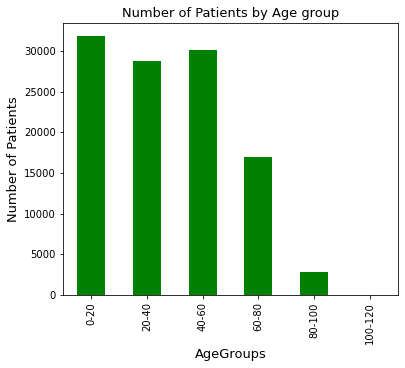

In [20]:
AgeGroup_grouped = df_edited.groupby(['AgeGroup'])['AgeGroup'].count()
print(AgeGroup_grouped)


# calling the plot_figure function to plot number of patients by Age group.

plot_figure(df=AgeGroup_grouped, color = 'green', xlabel='AgeGroups',
           ylabel='Number of Patients',
           title='Number of Patients by Age group',
           plot_type='bar',  figsize= (6,5))

From the plot of Population by Age group above, the age group `0-20` has the highest population followed by age group `40-60`

### Which age group had the highest number of Scholarship recipients?

In answering this question, the dataset is masked to reveal the number of patients that are scholarship recipients and the resulting dataframe is grouped using the column `AgeGroup`

In [21]:
# Investigating the age group with the highest number of patients enrolled in the welfare programme (i.e scholarship recipients)

scholarship_recipients = df_edited.query('Scholarship == 1')

scholarship_recipientsGrouped = scholarship_recipients.groupby('AgeGroup')['Scholarship'].count()

print(scholarship_recipientsGrouped)


AgeGroup
0-20       3559
20-40      4162
40-60      2602
60-80       530
80-100        8
100-120       0
Name: Scholarship, dtype: int64


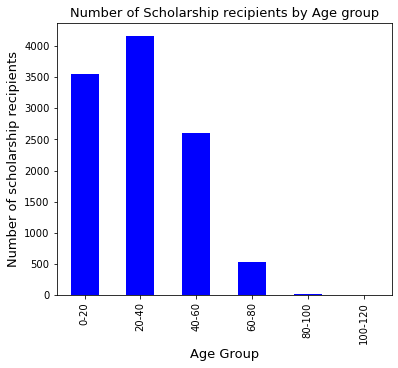

In [22]:
# calling the plot_figure function to plot number of scholarship recipients by Age group

plot_figure(scholarship_recipientsGrouped, plot_type='bar',
           color = 'blue', xlabel = 'Age Group',
           ylabel = 'Number of scholarship recipients',
           title = 'Number of Scholarship recipients by Age group',
           figsize = (6,5))

From the plot above the age group `20-40` had the highest number of patients who were recipients of the welfare programme (i.e scholarship recipients)

### Which age group is mostly associated with Hypertensive patients?

The dataset is masked to view only patients with hypertension and the resulting dataframe is grouped using the `AgeGroup` column

In [23]:
hyper_patients = df_edited.query('Hipertension == 1')

hyper_patientsGrouped = hyper_patients.groupby('AgeGroup')['Hipertension'].count()

print(hyper_patientsGrouped)

AgeGroup
0-20         49
20-40      1745
40-60      9005
60-80      9202
80-100     1799
100-120       1
Name: Hipertension, dtype: int64


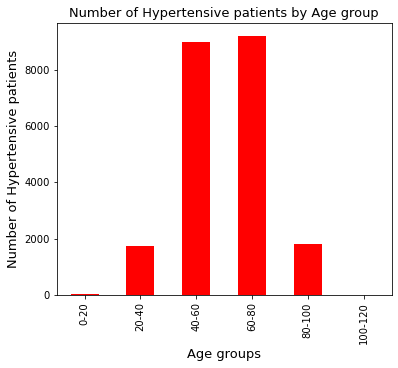

In [24]:
# calling the plot_figure function to plot number of hypertensive patients by Age group

plot_figure(hyper_patientsGrouped, plot_type='bar',
           xlabel = 'Age groups', ylabel = 'Number of Hypertensive patients',
           color = 'red',
           title = 'Number of Hypertensive patients by Age group',
           figsize = (6,5))

The `60-80` age group had the highest number of hypertensive patients followed by the `40-60` age group.

### Which age group has the highest number of Diabetes patients?

In [25]:
diabetics = df_edited.query('Diabetes == 1') # masking the dataset to view all diabetic patients

diabeticsGrouped = diabetics.groupby('AgeGroup')['Diabetes'].count()

print(diabeticsGrouped)

AgeGroup
0-20         61
20-40       507
40-60      2988
60-80      3801
80-100      586
100-120       0
Name: Diabetes, dtype: int64


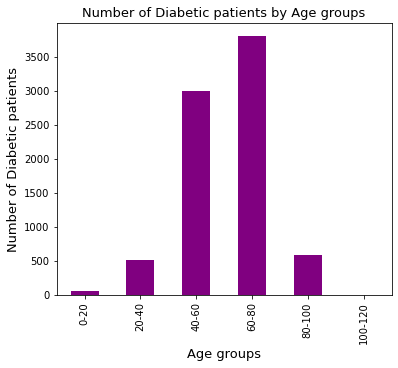

In [26]:
# calling the plot_figure function to plot number of diabetic patients by Age group

plot_figure(diabeticsGrouped, plot_type='bar',
           xlabel = 'Age groups', ylabel = 'Number of Diabetic patients',
           title = 'Number of Diabetic patients by Age groups',
           figsize = (6,5), color = 'purple')

The `60-80` age group has the highest number of Diabetics followed by the `40-60` age group

### Which age group has the highest number of patient suffering from alcoholism?


In [27]:
alcoholic = df_edited.query('Alcoholism == 1')

alcoholicGrouped = alcoholic.groupby('AgeGroup')['Alcoholism'].count()

alcoholicGrouped

AgeGroup
0-20         35
20-40       730
40-60      1860
60-80       714
80-100       21
100-120       0
Name: Alcoholism, dtype: int64

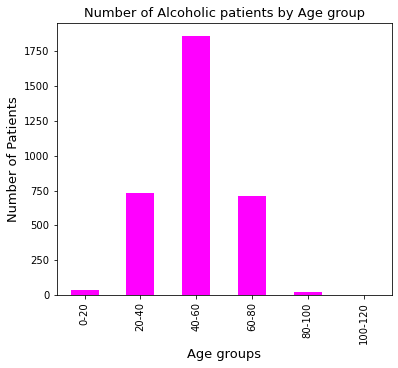

In [28]:
# calling the plot_function to plot a bar chart of number of alcoholics by age group

plot_figure(alcoholicGrouped, plot_type='bar',
           xlabel = 'Age groups',
           ylabel = 'Number of Patients',
           title = 'Number of Alcoholic patients by Age group',
           figsize = (6,5),
           color = 'magenta')

The age group `40-60` has the highest number of patients suffering from Alcoholism.

### Does Certain Age groups show up more for a scheduled appointment? If yes, why?

A probable factor that determines if a patient will show up for a scheduled appointment is the Age of the patient.  

In [29]:
# Masking the dataset to view only those that showed up for their appointment. 
showed_up = df_edited.query("`No-show` == 'No'")

# segmenting the masked dataset into age groups
showedUp_AgeGroup = showed_up.groupby(['AgeGroup'])['AppointmentID'].count()

print(showedUp_AgeGroup)

AgeGroup
0-20       24752
20-40      22209
40-60      24490
60-80      14373
80-100      2379
100-120        4
Name: AppointmentID, dtype: int64


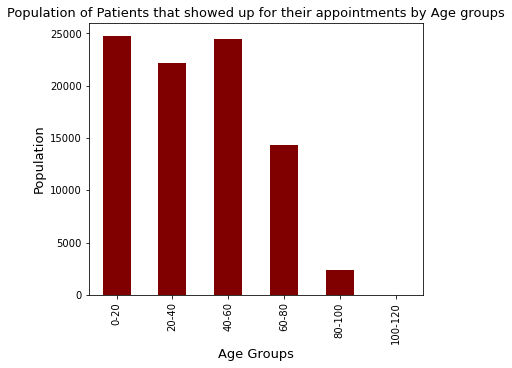

In [30]:
# calling the plot_figure function to plot a bar chart of patients that showed up by Age groups

plot_figure(df=showedUp_AgeGroup, color = 'maroon',
            plot_type='bar', xlabel = 'Age Groups', 
            ylabel = 'Population', 
            title= 'Population of Patients that showed up for their appointments by Age groups',
           figsize = (6,5))

From the plot above, the age groups `0-20` and `40-60` can be seen to have the highest population of patients who showed up for their appointments.

A quick look at the fraction of patients who registered for an appointment and those that showed up will give a better insight at the Age group that showed up most for a scheduled appointment. 

In [31]:
AgeGroup_grouped # a pandas series of the number of patients appointments by age group

showedUp_AgeGroup # a pandas series of the number of patients that showed up by their age group.

showedUp_AgeGroup_frac = showedUp_AgeGroup/AgeGroup_grouped

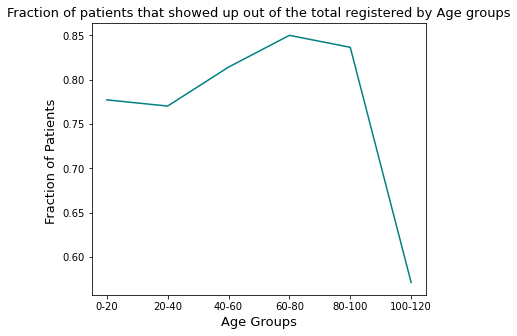

In [32]:
plot_figure(showedUp_AgeGroup_frac, plot_type='line',
           xlabel = 'Age Groups',
           ylabel = 'Fraction of Patients ',
           title = 'Fraction of patients that showed up out of the total registered by Age groups',
           color = 'teal',
           figsize = (6,5))

From the plot of `Fraction of patients that showed up out of the total registered by Age Groups`, the age group `60-80` had the highest fraction of patients that showed up out of the total registered. This is because the age group `60-80` had the highest number of patients associated with diabetes and hypertension.

### Do patients with ailments show up more for appointments?

The previous analysis proves this to a certain extent but a look at it across all age groups brings along a new insight!

21801


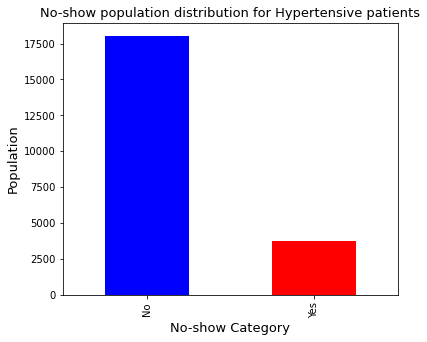

In [33]:
# Checking the No-show distribution of hypertensive patients using the plot_figure function

print(hyper_patients['Hipertension'].count())

Hyper_noShow = hyper_patients.groupby(['No-show'])['Hipertension'].count()

plot_figure(df = Hyper_noShow,color = ['blue','red'], plot_type='bar',
            xlabel = 'No-show Category', ylabel = 'Population', 
            title = 'No-show population distribution for Hypertensive patients', 
           figsize = (6,5))

Keeping in mind that the encoding of **No-show = No** implies that the patient showed for the appointment; this reveals that **Hypertensive patients showed up more for their appointments with the doctor**

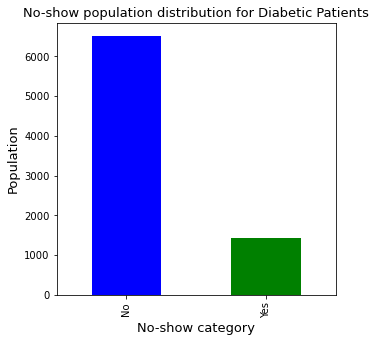

In [34]:
# Checking the No-show distribution for Diabetic patients

diabetics_noShow = diabetics.groupby('No-show')['Diabetes'].count()

# calling the plot_figure function to view the No-show distribution of diabetic patients

plot_figure(df=diabetics_noShow, plot_type='bar',
           color = ['blue', 'green'], ylabel = 'Population',
           xlabel = 'No-show category',
           title = 'No-show population distribution for Diabetic Patients',
           figsize = (5,5))


The number of Diabetes patients that showed up for their appointment were more than those that missed theirs.

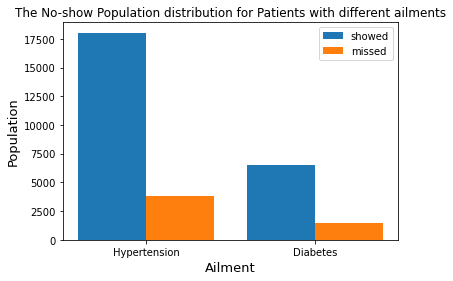

In [35]:
# viewing the No-show distribution of both ailments on a single plot

patients = ['Hypertension', 'Diabetes']

X_axis = np.arange(len(patients))

bar1 = [Hyper_noShow[0], diabetics_noShow[0]]
bar2 = [Hyper_noShow[1], diabetics_noShow[1]]
plt.bar(X_axis-0.2, bar1, 0.4, label = 'showed')
plt.bar(X_axis+0.2, bar2, 0.4, label = 'missed')
plt.xlabel('Ailment', fontsize = 13)
plt.ylabel('Population', fontsize=13)
plt.title('The No-show Population distribution for Patients with different ailments')
plt.xticks(X_axis, patients)
plt.legend();

From this plot, it can deduced that patients suffering from one ailment or the other across all age groups tend to show up more for their scheduled appointment.

### Is enrollment in the welfare programme a determing factor for patients showing up for their scheduled appointment?

In answering this question, we'll take a look at the the number of patients who showed up for their appointments and group this value into those that were enrolled for the programme(i.e Scholarship recipients) and those that were not.

Scholarship
0    79924
1     8283
Name: Scholarship, dtype: int64


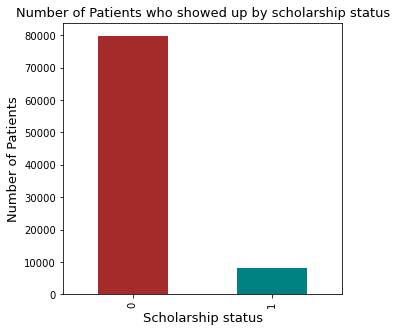

In [36]:
# grouping the patients that showed up into scholarship recipients (enrollment in welfare programme). 

scholarship_showed = showed_up.groupby(['Scholarship'])['Scholarship'].count()

print(scholarship_showed)

plot_figure(df = scholarship_showed, plot_type='bar',
            xlabel='Scholarship status',
           ylabel = 'Number of Patients',
           title = 'Number of Patients who showed up by scholarship status',
           color = ['brown','teal'],
           figsize = (5,5))




This plot clearly shows that the probability that a patient shows up for an appointment is not based on his or her scholarship status because most of the patients that showed up for their scheduled appointments were not scholarship recipients (i.e they were not enrolled in the welfare programme). 

**PS: 0 = False, 1 = True**

### Does waiting time have an effect on patients showing up or missing their appointments?

This question can be approached by viewing the number of patients that showed up and grouping them by the number of days they had to wait; comparing it with the patients that missed their appointments and grouping them by the number of days they had to wait.

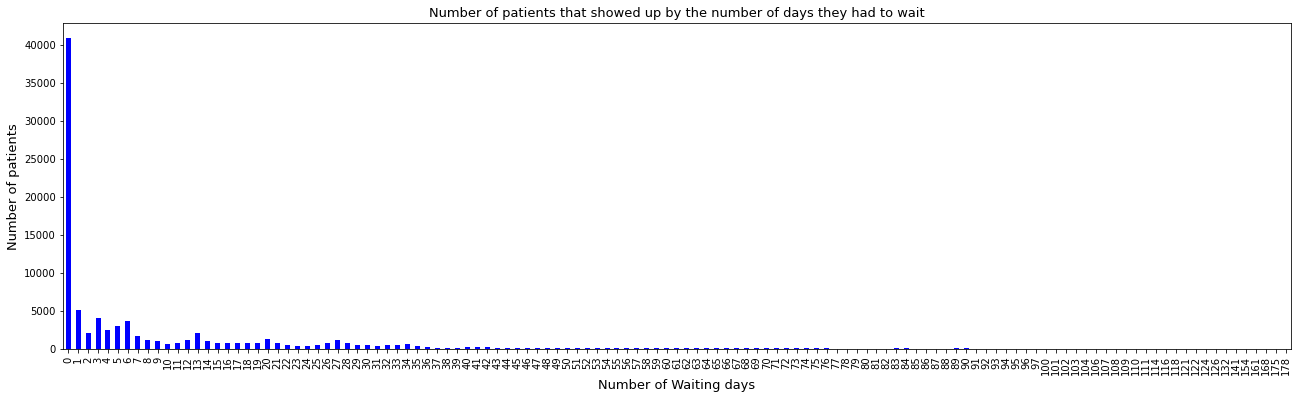

In [37]:
showed_up # previously defined for number of patients that showed up for their appointments 

# grouping the number of patients that showed up by the number of days they had to wait.
showed_upWait = showed_up.groupby('WaitingDays')['AppointmentID'].count() 


# calling the plot_function to create a bar plot to show the number of patients that
# showed up and the number of days they had to wait.

plot_figure(showed_upWait, plot_type='bar',
           xlabel = 'Number of Waiting days',
           ylabel = 'Number of patients',
           title = 'Number of patients that showed up by the number of days they had to wait',
           color = 'blue',
           figsize = (22,6))

From the plot above, the number of patients that showed up for their appointment kept reducing as the number of days they had to wait increased. Appointments fixed on the day it was registered attracted the most number of patients (46% of the total appointments where the patients showed up).This implies that having an appointment fixed on the day it was registered had a huge influence on the patient showing up. Now, this will be compared with patients that missed their appointments and the number of days they had to wait before seeing the doctor.

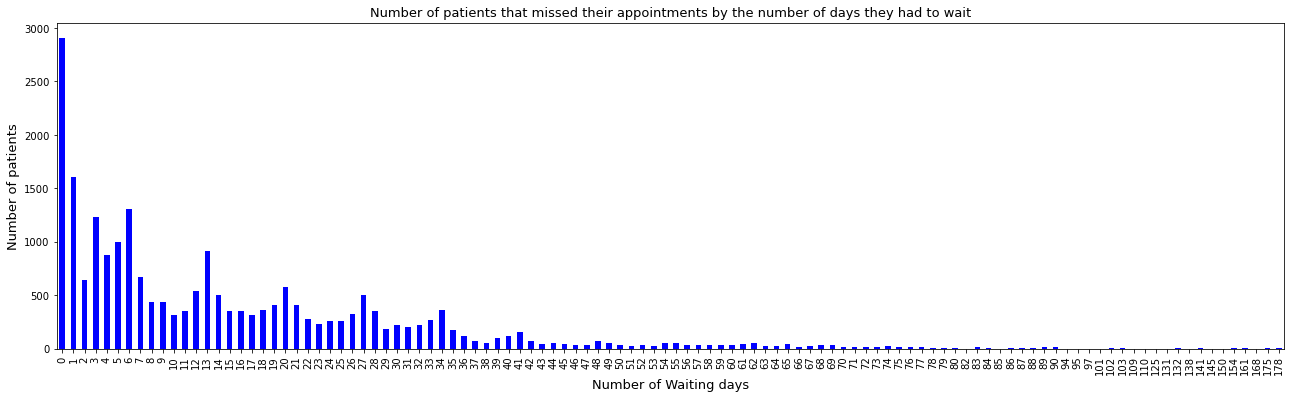

In [38]:
# masking the dataset to view patients who missed their appointments
missed = df_edited.query('`No-show` == "Yes"')

# grouping the patients that missed their appointments by the number of days they had to wait
missed_Wait = missed.groupby('WaitingDays')['AppointmentID'].count()


plot_figure(missed_Wait, plot_type='bar',
           xlabel = 'Number of Waiting days',
           ylabel = 'Number of patients',
           title = 'Number of patients that missed their appointments by the number of days they had to wait',
           color = 'blue',
           figsize = (22,6))

Compared to the previous chart on *Number of Patients that showed up by the number of days they had to wait*, 13% of patients that missed their appointments were scheduled to see the doctor on the same day the appointment was registered. We cannot sufficely say that the number of waiting days influences a patient missing an appointment because most patients that missed their appointments had their appointments fixed on the day it was registered.

In [39]:
print(showed_upWait.sum())
print(showed_upWait[0])
print(showed_upWait[1:].sum())
print(showed_upWait[0]/showed_upWait.sum())
print(showed_upWait[1:].sum()/showed_upWait.sum())

print(missed_Wait[0])
print(missed_Wait[1:].sum())
print(missed_Wait.sum())
print(missed_Wait[0]/missed_Wait.sum())
print(missed_Wait[1:].sum()/missed_Wait.sum())

88207
40870
47337
0.46334191163966576
0.5366580883603342
2905
19409
22314
0.1301873263422067
0.8698126736577934


### Does SMS receival influence the showing of a patient for a scheduled appointment?

This question can be approached by comparing the number of patients that received an SMS reminder and showed up for their appointment to those that didn't and also showed up.

SMS_received
0    75039
1    35482
Name: AppointmentID, dtype: int64


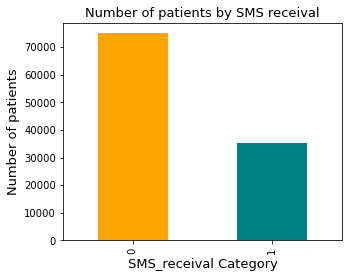

In [40]:
# masking the dataset to view those that received an SMS
SMS_received_yes = df_edited.query('SMS_received == 1')

# masking the dataset to reveal those that did not receive an SMS 
SMS_received_no = df_edited.query('SMS_received == 0')

#grouping the dataset by SMS_receival to compare the number of those that received an SMS to those that did not.
SMS_received_grouped = df_edited.groupby('SMS_received')['AppointmentID'].count()

print(SMS_received_grouped)

plot_figure(SMS_received_grouped, plot_type='bar',
           xlabel= 'SMS_receival Category',
           ylabel = 'Number of patients',
           title = 'Number of patients by SMS receival',
           figsize = (5,4),
           color = ['orange', 'teal'])




This plot clearly shows that the number of patients that did not receive an SMS reminder (about 67%) is higher than those that did (32%)

This can be investigated further to reveal if the receiving of an SMS influenced the showing of a patient for a scheduled appointment. This can be approached by comparing the number of those that received an SMS and showed for a scheduled appointment to those that received an SMS and still missed the appointment.

In [41]:
# grouping the dataframe of those that received an SMS by the No-show column

SMS_received_yes_NoShow = SMS_received_yes.groupby(['No-show'])['AppointmentID'].count()

print(SMS_received_yes_NoShow)

No-show
No     25698
Yes     9784
Name: AppointmentID, dtype: int64


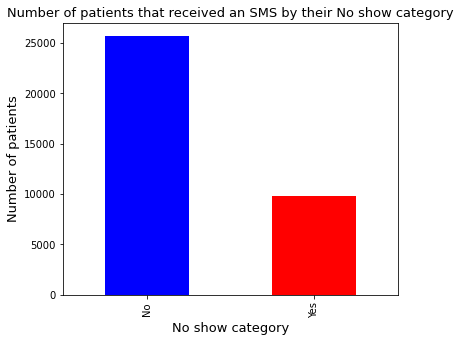

In [42]:
# calling the plot_figure function to view the values graphically

plot_figure(SMS_received_yes_NoShow, plot_type='bar',
           ylabel = 'Number of patients',
           xlabel = 'No show category',
           title = 'Number of patients that received an SMS by their No show category',
           color = ['blue', 'red'],
           figsize = (6,5))

From the plot of patients that received an SMS and their No-show category, it can be deduced that the number of those that received an SMS and showed for the appointment is greater than those that received an SMS and still missed their appointment.

Lets investigate further to view the number of people people that didn't receive an SMS and yet showed up for their appointment.

In [43]:
# grouping the dataframe of those did not receive an SMS by the No-show column

SMS_received_no_NoShow = SMS_received_no.groupby('No-show')['AppointmentID'].count()

In [44]:
SMS_received_no_NoShow

No-show
No     62509
Yes    12530
Name: AppointmentID, dtype: int64

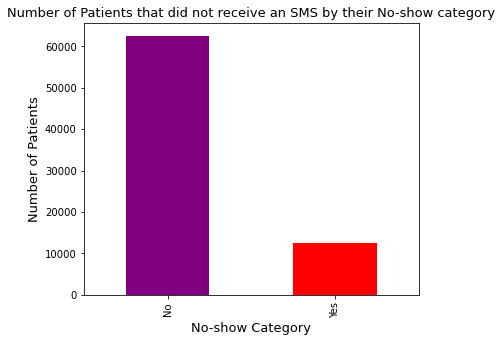

In [45]:
# calling the plot_figure function to view the values graphically

plot_figure(SMS_received_no_NoShow, plot_type='bar',
           xlabel = 'No-show Category',
           ylabel = 'Number of Patients',
           title = 'Number of Patients that did not receive an SMS by their No-show category',
           color = ['purple', 'red'],
           figsize = (6,5))

---
This plot reveals that those that didn't receive an SMS and yet showed up for their appointment is higher than those that didn't and missed their appointment.

We can conclusively say the receival of an SMS reminder does not influence a patient showing up for a scheduled appointment because the percentage of those that didn't receive an SMS and yet showed up for their appointment is much higher (83%) than those that received an SMS and showed up (72%)

<a id = conclusion ></a>
## Conclusion

___
This project sought to determine the factors to be considered, in order to predict the showing up 
of a patient, for a scheduled appointment and from the investigations carried out, the following was discovered:

><li>The Age group 0-20 had the highest number of patients followed by age group 40-60
><li>The age group 20-40 had the highest number of scholarship recipients followed by the age group 0-20
><li>The 60-80 age group had the highest number of hypertensive and diabetic patients followed by the 40-60 age group; whereas most alcoholic patients were in the age range 40-60.
><li>The age group 60-80 had the highest fraction of patients that showed up and this was because it was the age group with the highest number of patients suffering from Diabetes and Hypertension.
><li> Across all age groups, patients with ailments(Diabetes and hypertension) show up more for their scheduled appointment compared to others.
><li>Being enrolled in the scholarship programme does not influence the showing up of a patient for a scheduled appointment because most patients that showed up were not scholarship recipients.
><li> The number of waiting days played a huge role in the showing up of a patient for a scheduled appointment because 46% of those who showed up had their appointments fixed on the day it was registered.
><li> There was a 10.9% difference in the number of people that didn't receive an SMS; yet showed up, compared to the number of those that did and showed up. So, SMS receival has no significance.
    
Therefore it can be conclusively said that **the number of waiting days**
    and **whether a patient has an ailment** are the most important factors to consider when predicting if a patient will show up for a scheduled appointment.
    
> The only limitation of this dataset is that it cannot be ascertained if the data is real and verified.